In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("restaurant.csv")

In [3]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [5]:
df.isnull().sum() #We examine the empty lines.

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

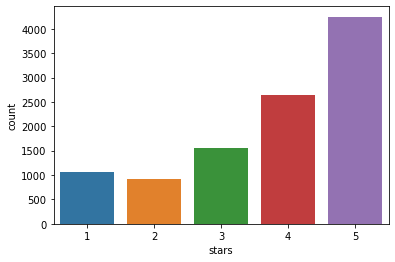

In [6]:
sns.countplot(df.stars);

In [7]:
df["date"]=pd.to_datetime(df["date"])
df["day"]=(df["date"]).dt.day
df["month"]=(df["date"]).dt.month
df["year"]=(df["date"]).dt.year
df["time"]=(df["date"]).dt.time
#We divide date data into day, month, year and time.

In [8]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,month,year,time
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,4,12,2012,03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,17,1,2014,00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,8,6,2015,18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,19,12,2016,16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,28,7,2015,07:13:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,17,11,2019,20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,12,11,2019,02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,12,12,2019,03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,1,11,2019,21:00:51


In [9]:
a=list()
for i in range(1,13):
    f=df[df["month"]==i].stars.mean()
    a.append(f)
print(a)
#We calculate star averages by month.

[3.6791569086651053, 3.7924263674614305, 3.778205128205128, 3.8310727496917387, 3.7903225806451615, 3.7891156462585034, 3.748148148148148, 3.8788546255506606, 3.9052083333333334, 3.914686825053996, 3.781477627471384, 3.47035175879397]


In [10]:
df["year"].value_counts()

2019    1685
2017    1588
2015    1419
2018    1407
2016    1372
2014    1319
2013    1200
2012     427
Name: year, dtype: int64

In [11]:
c=list()
for i in range(2012,2020):
    b=df[df["year"]==i].stars.mean()
    c.append(b)
print(c)

[3.899297423887588, 3.930833333333333, 3.8097043214556483, 3.8703312191684285, 3.6137026239067054, 3.6857682619647356, 3.7142857142857144, 3.807715133531157]


Text(0, 0.5, 'Stars')

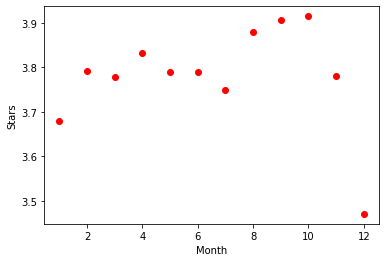

In [12]:
plt.scatter(range(1,13),a,color="red")
plt.xlabel("Month")
plt.ylabel("Stars")

Text(0, 0.5, 'Stars')

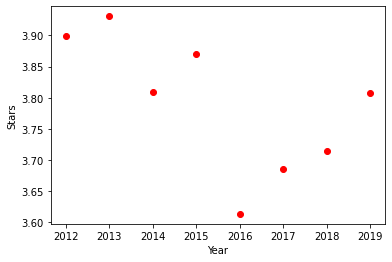

In [13]:
plt.scatter(range(2012,2020),c,color="red")
plt.xlabel("Year")
plt.ylabel("Stars")

In [14]:
df["text"]=df["text"].str.lower() #We convert our texts to lowercase.
df["text"]=df["text"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["text"]=df["text"].str.replace("\d+","") #We are removing numbers from our texts.
df["text"]=df["text"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.

In [15]:
z=df[df["stars"]>3]
z["P|N"]=1 #Positive
e=df[df["stars"]<3]
e["P|N"]=0 #Negative
stars1=df[df["stars"]>4]
stars5=df[df["stars"]<2]

In [16]:
df2=e.append(z)

In [17]:
df2

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,month,year,time,P|N
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,19,12,2016,16:15:29,0
12,2371349,7aYfSp52nU6UbZbeRZ2c-g,ic-tyi1jElL_umxZVh8KNA,RESDUcs7fIiihp38-d6_6g,1,0,0,0,food is fine better than most buffets when i r...,2015-07-16 07:53:22,16,7,2015,07:53:22,0
29,2372401,GEduC77Los1XbvUyAEiNqw,PweT8hEJbciB6CxTS1IDNA,RESDUcs7fIiihp38-d6_6g,2,0,1,0,so i come here on my birthday thinking its the...,2014-03-14 05:30:28,14,3,2014,05:30:28,0
33,2372856,nK4OlgQ11QMZ_pMgeE9BzA,QPKF4JnGJrYKnC9gzwEc-w,RESDUcs7fIiihp38-d6_6g,1,0,0,0,be careful using the restroom here while i was...,2017-10-24 19:57:44,24,10,2017,19:57:44,0
42,2373049,Pk2wt09vPduh8Q-lYaKSMA,-AMD0gRrSuYX_ZYy5jMzNg,RESDUcs7fIiihp38-d6_6g,2,0,0,0,what a money pit food was terrible and not lab...,2013-10-24 04:06:22,24,10,2013,04:06:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,17,11,2019,20:39:36,1
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,12,11,2019,02:23:07,1
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,12,12,2019,03:27:22,1
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,1,11,2019,21:00:51,1


In [18]:
df2.reset_index(drop=True,inplace=True)
df2

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,month,year,time,P|N
0,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,19,12,2016,16:15:29,0
1,2371349,7aYfSp52nU6UbZbeRZ2c-g,ic-tyi1jElL_umxZVh8KNA,RESDUcs7fIiihp38-d6_6g,1,0,0,0,food is fine better than most buffets when i r...,2015-07-16 07:53:22,16,7,2015,07:53:22,0
2,2372401,GEduC77Los1XbvUyAEiNqw,PweT8hEJbciB6CxTS1IDNA,RESDUcs7fIiihp38-d6_6g,2,0,1,0,so i come here on my birthday thinking its the...,2014-03-14 05:30:28,14,3,2014,05:30:28,0
3,2372856,nK4OlgQ11QMZ_pMgeE9BzA,QPKF4JnGJrYKnC9gzwEc-w,RESDUcs7fIiihp38-d6_6g,1,0,0,0,be careful using the restroom here while i was...,2017-10-24 19:57:44,24,10,2017,19:57:44,0
4,2373049,Pk2wt09vPduh8Q-lYaKSMA,-AMD0gRrSuYX_ZYy5jMzNg,RESDUcs7fIiihp38-d6_6g,2,0,0,0,what a money pit food was terrible and not lab...,2013-10-24 04:06:22,24,10,2013,04:06:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,17,11,2019,20:39:36,1
8852,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,12,11,2019,02:23:07,1
8853,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,12,12,2019,03:27:22,1
8854,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,1,11,2019,21:00:51,1


In [19]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df2.text
y=df2["P|N"]
x=vect.fit_transform(x)

In [20]:
x

<8856x28747 sparse matrix of type '<class 'numpy.int64'>'
	with 454662 stored elements in Compressed Sparse Row format>

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)

In [22]:
mb.fit(x_train,y_train)
accuracy_score(y_test,mb.predict(x_test))

0.9006772009029346

In [23]:
precision_score(y_test,mb.predict(x_test))

0.9187887130075706

In [24]:
recall_score(y_test,mb.predict(x_test))

0.9583632447954056

In [25]:
f1_score(y_test,mb.predict(x_test))

0.9381588193956432

In [26]:
k.fit(x_train,y_train)
accuracy_score(y_test,k.predict(x_test))

0.7821670428893905

In [27]:
precision_score(y_test,k.predict(x_test))

0.8172652804032766

In [28]:
recall_score(y_test,k.predict(x_test))

0.9310839913854989

In [29]:
f1_score(y_test,k.predict(x_test))

0.8704697986577181

In [30]:
d.fit(x_train,y_train)
accuracy_score(y_test,d.predict(x_test))

0.8329571106094809

In [31]:
precision_score(y_test,d.predict(x_test))

0.8892831795599716

In [32]:
recall_score(y_test,d.predict(x_test))

0.8994974874371859

In [33]:
f1_score(y_test,d.predict(x_test))

0.8943611705924339

In [34]:
r.fit(x_train,y_train)
accuracy_score(y_test,r.predict(x_test))

0.8730248306997742

In [35]:
precision_score(y_test,r.predict(x_test))

0.8636363636363636

In [36]:
recall_score(y_test,r.predict(x_test))

0.9956927494615937

In [37]:
f1_score(y_test,r.predict(x_test))

0.9249749916638879

In [38]:
l.fit(x_train,y_train)
accuracy_score(y_test,l.predict(x_test))

0.927765237020316

In [39]:
precision_score(y_test,l.predict(x_test))

0.9488999290276792

In [40]:
recall_score(y_test,l.predict(x_test))

0.9597989949748744

In [41]:
f1_score(y_test,l.predict(x_test))

0.9543183440399714

In [42]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
#We draw the most used words in tweets on a cloud.

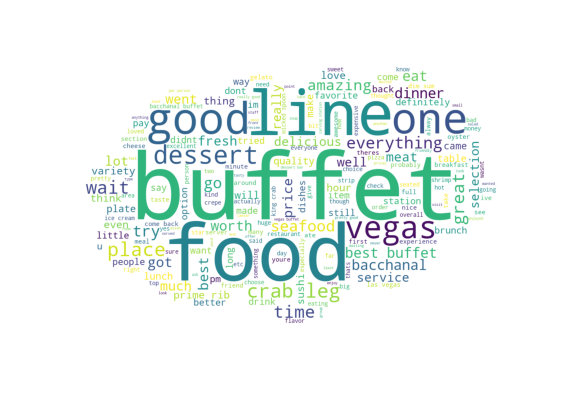

In [43]:
wc(z.text,"white")##Positive

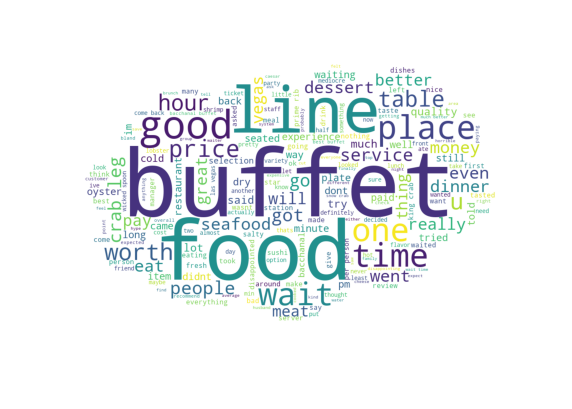

In [44]:
wc(e.text,"white")##Negative

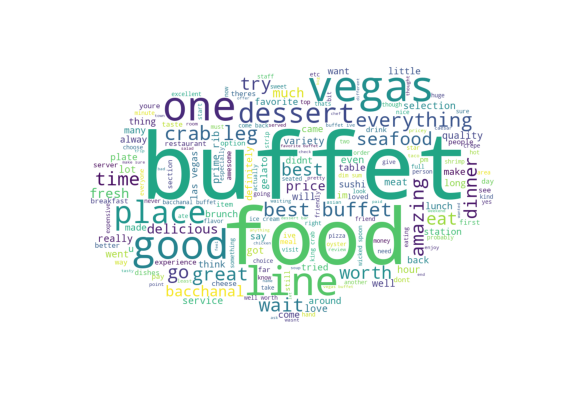

In [45]:
wc(stars1.text,"white")##Stars5

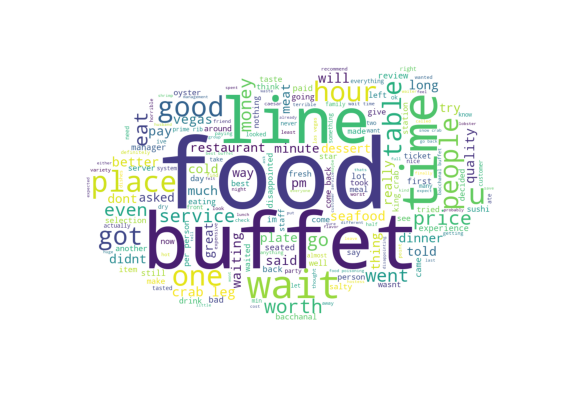

In [46]:
wc(stars5.text,"white")##Stars1

In [47]:
sent=df[["text","stars"]]

In [48]:
sent

,text,stars
0,after getting food poisoning at the palms hote...,5
1,a feast worthy of godsbaccarnal buffet in caes...,4
2,the crab legs are better than the ones at wick...,4
3,not worth it too salty food and expensive this...,1
4,i would give this infinite stars if i could my...,5
...,...,...
10412,best buffet ever irma was great served us bett...,5
10413,hollllllyyyy moleyyyy this buffet was one for ...,4
10414,the selection is amazing and all the food is e...,5
10415,one of the best buffets ive had in vegas my on...,4


In [49]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity
#We are doing our sentiment analysis.

In [50]:
sent["sentiment"]=sent["text"].apply(detect_sentiment)
sent.head()

,text,stars,sentiment
0,after getting food poisoning at the palms hote...,5,0.337330
1,a feast worthy of godsbaccarnal buffet in caes...,4,0.219409
2,the crab legs are better than the ones at wick...,4,-0.134722
3,not worth it too salty food and expensive this...,1,-0.325000
4,i would give this infinite stars if i could my...,5,0.362500


In [51]:
def sentiment2(sent):
    if (sent< -0.02):
        return 3
    elif sent>0.02:
        return 1
    else:
        return 0
#We divide the texts into three groups positive, negative and nötr.

In [52]:
sent["sent"]=sent["sentiment"].apply(sentiment2)
sent.head()

,text,stars,sentiment,sent
0,after getting food poisoning at the palms hote...,5,0.337330,1
1,a feast worthy of godsbaccarnal buffet in caes...,4,0.219409,1
2,the crab legs are better than the ones at wick...,4,-0.134722,3
3,not worth it too salty food and expensive this...,1,-0.325000,3
4,i would give this infinite stars if i could my...,5,0.362500,1


In [53]:
sent.sentiment.value_counts()

 0.500000    79
 0.000000    74
 0.300000    46
 0.250000    42
 0.400000    38
             ..
-0.011111     1
 0.405556     1
-0.146667     1
-0.096111     1
 0.185185     1
Name: sentiment, Length: 7907, dtype: int64